# Image Segmentation - Part 5: Background Subtraction

[Background subtraction](https://plantcv.readthedocs.io/en/stable/background_subtraction/) builds a color model from an image without the subject (e.g. plant) and segments pixels in the foreground image into those that fall within the background model and those that do not. Pixels that fall outside of the background distribution are labeled white.

In [ ]:
import os

# Detect notebook environment
def detect_notebook_environment():
    if 'COLAB_GPU' in os.environ:
        print('Google Colaboratory detected.')
        %pip install "altair>=5" ipympl plantcv
        
        # Give access and mount your Google Drive (need a Google Account)
        from google.colab import drive
        drive.mount('/content/gdrive')
        
        # Enable widget feature with matplotlib
        from google.colab import output
        output.enable_custom_widget_manager()
        
        #View working directory, may need to change
        %pwd
    else:
        print('Binder detected.')

environment = detect_notebook_environment()

In [1]:
%matplotlib inline
from plantcv import plantcv as pcv

In [2]:
pcv.params.debug = "plot"
pcv.params.text_size = 10
pcv.params.text_thickness = 5

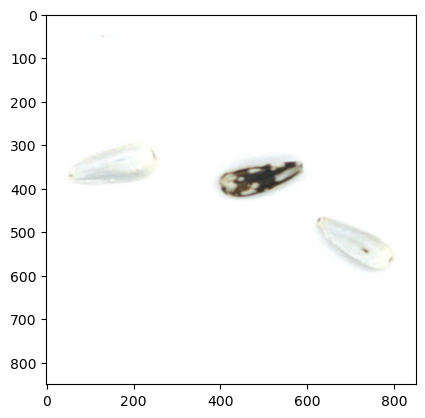

In [3]:
# Open the foreground image file
color_img, imgpath, imgname = pcv.readimage(filename="./images/helianthus_seeds.png")

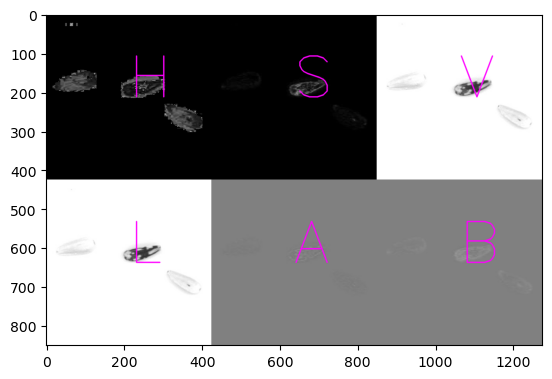

In [4]:
# Visualize color spaces
cs = pcv.visualize.colorspaces(rgb_img=color_img, original_img=False)

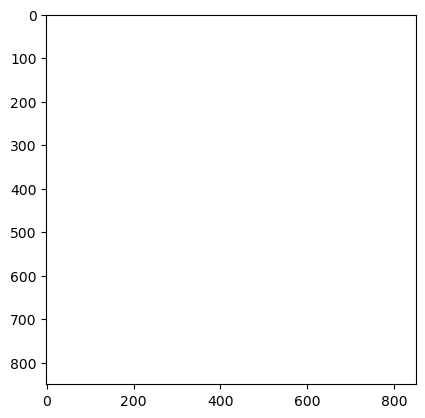

In [5]:
# Open the background image file
bkgd_img, bkgdpath, bkgdname = pcv.readimage(filename="./images/helianthus_background.png")

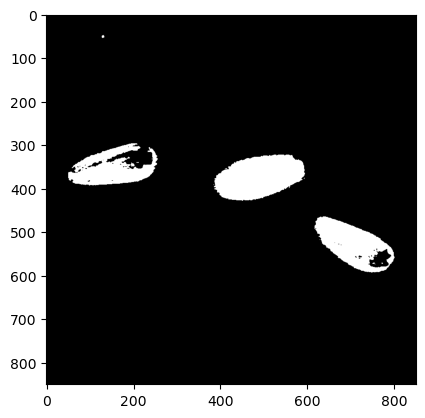

In [6]:
# Segment the plant roots using background subtraction
sub = pcv.background_subtraction(background_image=bkgd_img, foreground_image=color_img)